In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")
%matplotlib inline 

In [3]:
df = pd.read_csv("churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.isnull().sum()   

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df['TotalCharges'].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [10]:
# Check for missing values in 'TotalCharges' column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
df['TotalCharges'].value_counts()

TotalCharges
20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: count, Length: 6530, dtype: int64

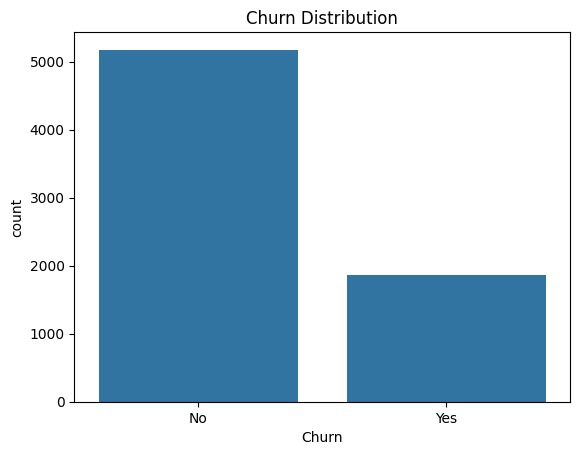

In [13]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


In [14]:
#insights : it is a imabalaced Dataset

In [16]:
numerical = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical = [feature for feature in df.columns if df[feature].dtype == 'O']

print("Numerical Features: ", numerical)
print("Categorical Features: ", categorical)

Numerical Features:  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Features:  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


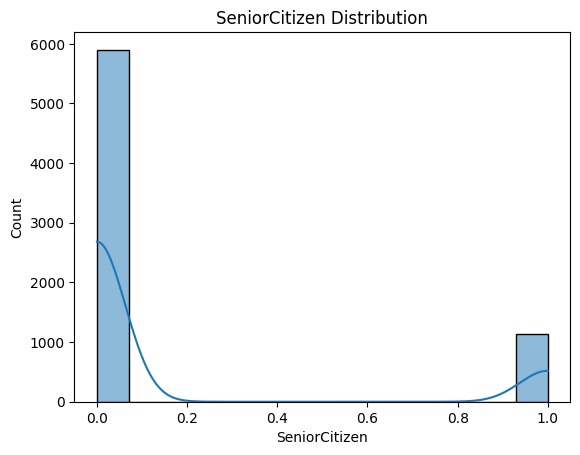

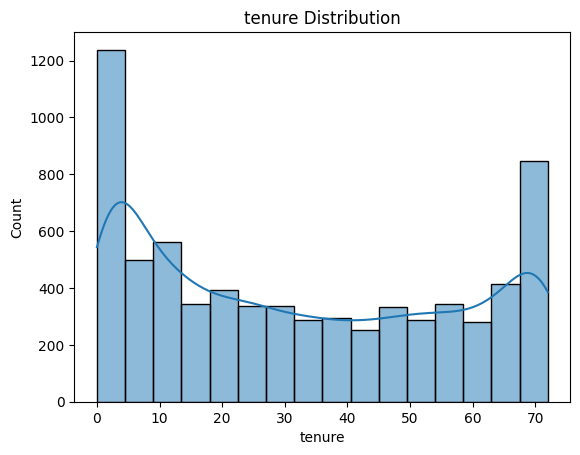

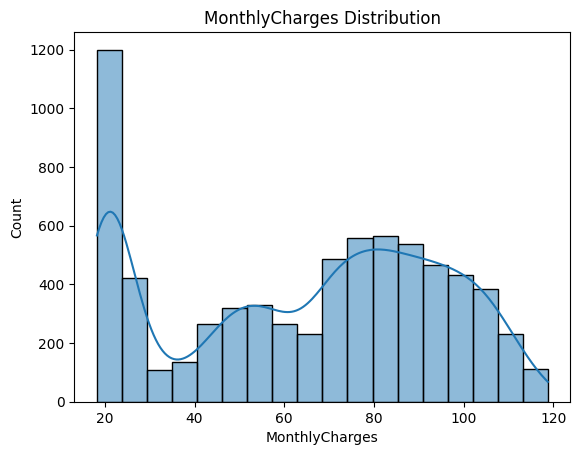

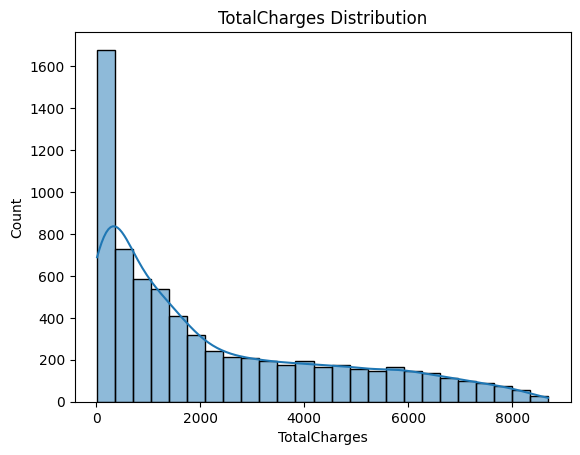

In [17]:
for col in numerical:
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.show()

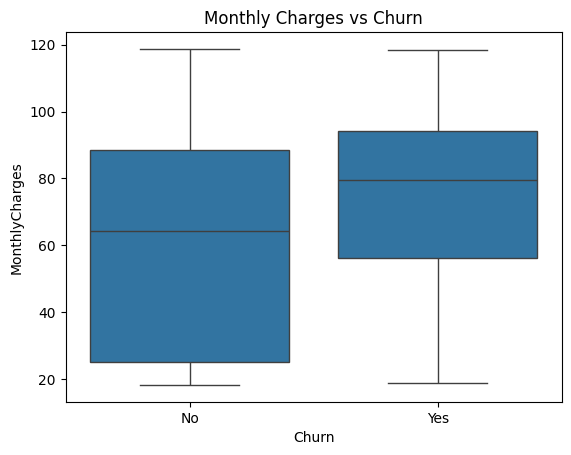

In [18]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


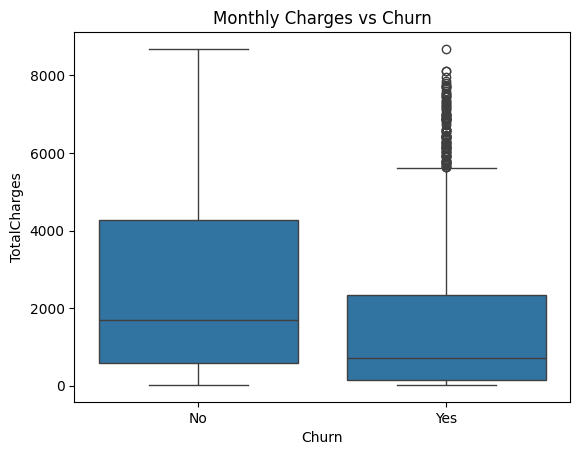

In [19]:
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

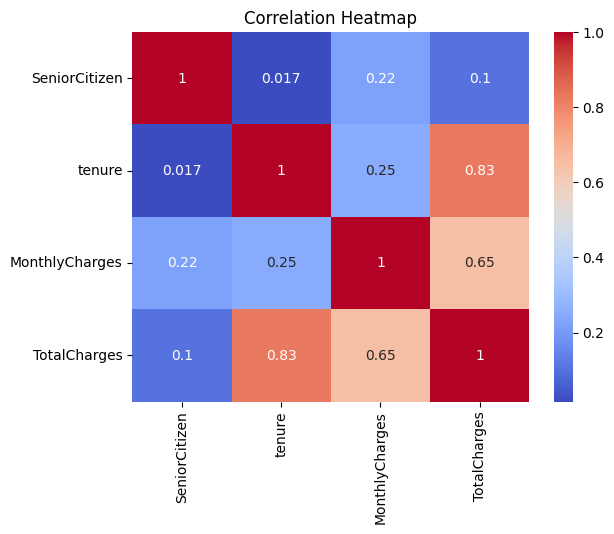

In [20]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


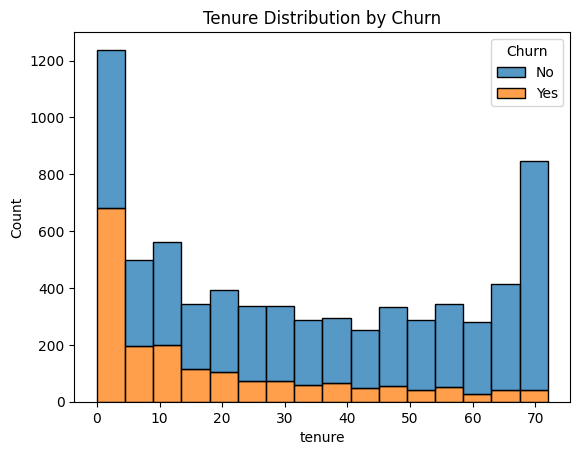

In [21]:
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack')
plt.title("Tenure Distribution by Churn")
plt.show()


<Figure size 800x600 with 0 Axes>

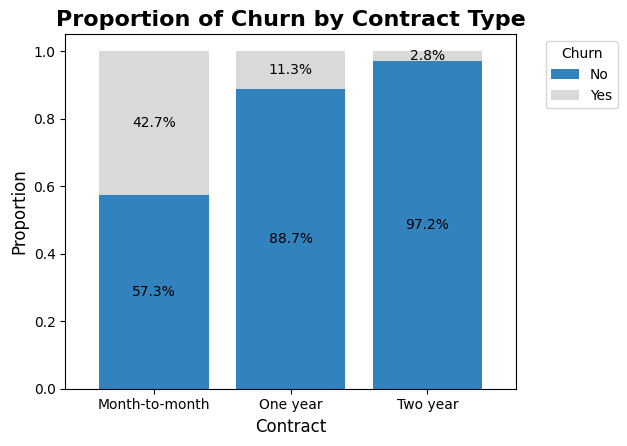

In [23]:

churn_by_contract = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()

# Plotting
plt.figure(figsize=(8, 6))
ax = churn_by_contract.plot(kind='bar', stacked=True, colormap='tab20c', width=0.8)

# Adding percentage labels on top of each segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    # Calculate the position for the label
    label = f"{height:.1%}" if height > 0 else ""
    ax.annotate(label, (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)

# Customize the plot
plt.title("Proportion of Churn by Contract Type", fontsize=16, fontweight='bold')
plt.xlabel("Contract", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.xticks(rotation=0)  # Ensure x-axis labels are horizontal
plt.legend(title="Churn", labels=["No", "Yes"], bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for title

# Show the plot
plt.show()


<Figure size 800x600 with 0 Axes>

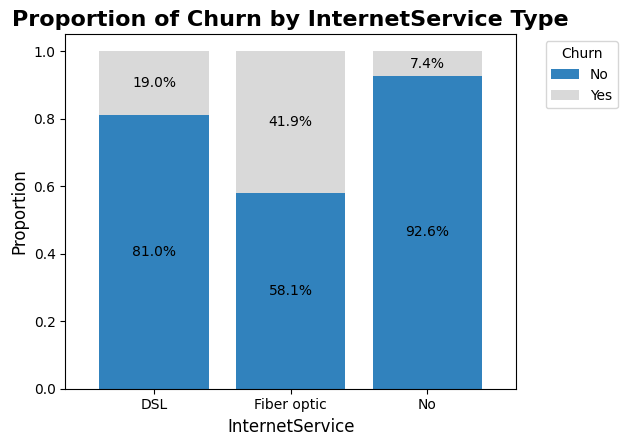

In [24]:
churn_by_InternetService = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()

# Plotting
plt.figure(figsize=(8, 6))
ax = churn_by_InternetService.plot(kind='bar', stacked=True, colormap='tab20c', width=0.8)

# Adding percentage labels on top of each segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    # Calculate the position for the label
    label = f"{height:.1%}" if height > 0 else ""
    ax.annotate(label, (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)

# Customize the plot
plt.title("Proportion of Churn by InternetService Type", fontsize=16, fontweight='bold')
plt.xlabel("InternetService", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.xticks(rotation=0)  # Ensure x-axis labels are horizontal
plt.legend(title="Churn", labels=["No", "Yes"], bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for title

# Show the plot
plt.show()

<Figure size 800x600 with 0 Axes>

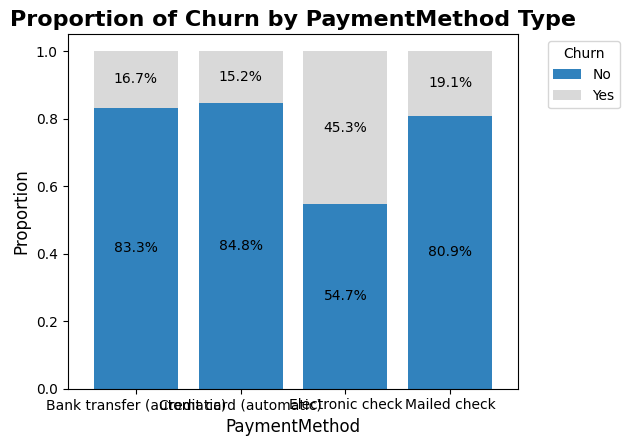

In [25]:
churn_by_PaymentMethod = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()

# Plotting
plt.figure(figsize=(8, 6))
ax = churn_by_PaymentMethod.plot(kind='bar', stacked=True, colormap='tab20c', width=0.8)

# Adding percentage labels on top of each segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    # Calculate the position for the label
    label = f"{height:.1%}" if height > 0 else ""
    ax.annotate(label, (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)

# Customize the plot
plt.title("Proportion of Churn by PaymentMethod Type", fontsize=16, fontweight='bold')
plt.xlabel("PaymentMethod", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.xticks(rotation=0)  # Ensure x-axis labels are horizontal
plt.legend(title="Churn", labels=["No", "Yes"], bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for title

# Show the plot
plt.show()

<Figure size 800x600 with 0 Axes>

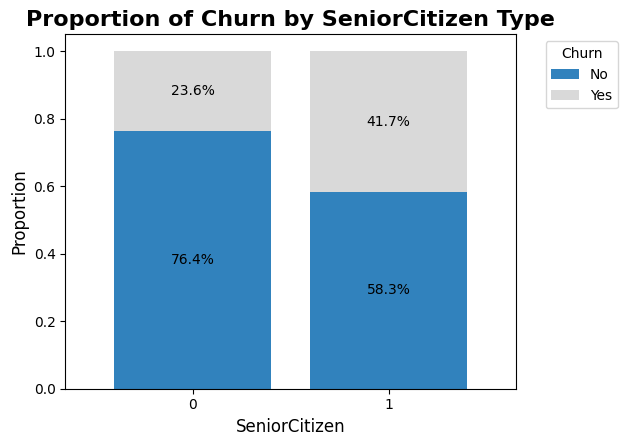

In [26]:
churn_by_SeniorCitizen = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()

# Plotting
plt.figure(figsize=(8, 6))
ax = churn_by_SeniorCitizen.plot(kind='bar', stacked=True, colormap='tab20c', width=0.8)

# Adding percentage labels on top of each segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    # Calculate the position for the label
    label = f"{height:.1%}" if height > 0 else ""
    ax.annotate(label, (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)

# Customize the plot
plt.title("Proportion of Churn by SeniorCitizen Type", fontsize=16, fontweight='bold')
plt.xlabel("SeniorCitizen", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.xticks(rotation=0)  # Ensure x-axis labels are horizontal
plt.legend(title="Churn", labels=["No", "Yes"], bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for title

# Show the plot
plt.show()

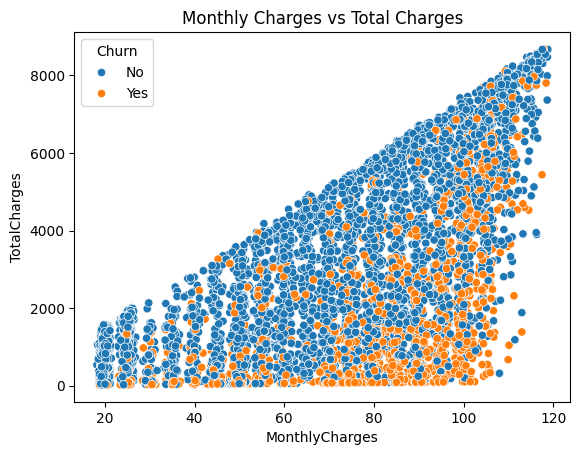

In [27]:
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df)
plt.title("Monthly Charges vs Total Charges")
plt.show()


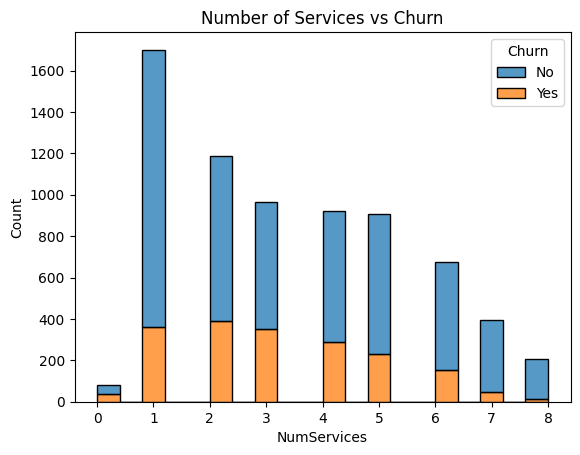

In [28]:
service_cols = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df['NumServices'] = (df[service_cols] == 'Yes').sum(axis=1)

sns.histplot(data=df, x='NumServices', hue='Churn', multiple='stack')
plt.title("Number of Services vs Churn")
plt.show()


In [30]:
df.columns
df.drop(columns=['customerID'], inplace=True)

In [31]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'NumServices'],
      dtype='object')

In [32]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 5


In [43]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 2


In [42]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 14


In [48]:
cat_features

['Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [39]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'NumServices'],
      dtype='object')

In [40]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in cat_features:
    if chi2_contingency(pd.crosstab(df['Churn'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cat_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,gender,Fail to Reject Null Hypothesis
1,Partner,Reject Null Hypothesis
2,Dependents,Reject Null Hypothesis
3,PhoneService,Fail to Reject Null Hypothesis
4,MultipleLines,Reject Null Hypothesis
5,InternetService,Reject Null Hypothesis
6,OnlineSecurity,Reject Null Hypothesis
7,OnlineBackup,Reject Null Hypothesis
8,DeviceProtection,Reject Null Hypothesis
9,TechSupport,Reject Null Hypothesis


In [41]:
df.drop(columns=['PhoneService','gender'], inplace=True)



In [36]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 3


In [44]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NumServices
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,3
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [67]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [69]:
y = y.map({'Yes': 1, 'No': 0})

In [70]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [71]:
or_columns = ['Contract']
oh_columns = ['Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'PaymentMethod']
transform_columns= ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'NumServices']

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [72]:
X = preprocessor.fit_transform(X)

In [73]:
X

array([[ 0.        ,  1.        ,  1.        , ..., -1.16169394,
        -0.99419409, -1.14618325],
       [ 1.        ,  0.        ,  1.        , ..., -0.26087792,
        -0.17373982, -0.17621386],
       [ 1.        ,  0.        ,  1.        , ..., -0.36392329,
        -0.95964911, -0.17621386],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -1.17000405,
        -0.85451414, -1.14618325],
       [ 0.        ,  1.        ,  1.        , ...,  0.31916782,
        -0.87209546, -0.66119856],
       [ 1.        ,  0.        ,  1.        , ...,  1.35793167,
         2.01234407,  1.27874021]])

In [74]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

In [75]:
df.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
NumServices         0
dtype: int64

In [76]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((5260, 45), (1315, 45))

In [77]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [78]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [79]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [80]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

In [81]:
base_model_report =evaluate_models(X=X_res, y=y_res, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9620
- F1 score: 0.9655
- Precision: 0.9681
- Recall: 0.9628
- Roc Auc Score: 0.9619


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9369
- F1 score: 0.9430
- Precision: 0.9398
- Recall: 0.9463
- Roc Auc Score: 0.9358


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9625
- F1 score: 0.9665
- Precision: 0.9643
- Recall: 0.9686
- Roc Auc Score: 0.9618
----------------------------------
Model performance for Test set
- Accuracy: 0.9384
- F1 score: 0.9446
- Precision: 0.9388
- Recall: 0.9504
- Roc Auc Score: 0.9370


Logistic Regression
Model performance for Training 

In [82]:
base_model_report

,Model Name,Accuracy
0,Random Forest,0.961977
5,XGBClassifier,0.959696
6,CatBoosting Classifier,0.957414
4,K-Neighbors Classifier,0.946008
2,Gradient Boosting,0.938403
1,Decision Tree,0.936882
8,AdaBoost Classifier,0.926236
7,Support Vector Classifier,0.916350
3,Logistic Regression,0.906464


In [83]:
xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

In [84]:
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params)
]

In [85]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
---------------- Best Params for XGBoost -------------------
{'min_child_weight': 1, 'max_depth': 9}
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': None}
---------------- Best Params for KNN -------------------
{'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}


In [86]:
model_param

{'XGBoost': {'min_child_weight': 1, 'max_depth': 9},
 'RF': {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': None},
 'KNN': {'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}}

In [87]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
}
tuned_report =evaluate_models(X=X_res, y=y_res, models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9643
- F1 score: 0.9676
- Precision: 0.9683
- Recall: 0.9669
- Roc Auc Score: 0.9639


KNeighborsClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9741
- F1 score: 0.9770
- Precision: 0.9613
- Recall: 0.9931
- Roc Auc Score: 0.9719


XGBClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9582
- F1 score: 0.9623
- Precision: 0.9590
- Recall: 0.9656
- Roc Auc Score: 0.9573




In [88]:
tuned_report

,Model Name,Accuracy
1,KNeighborsClassifier,0.974144
0,Random Forest Classifier,0.964259
2,XGBClassifier,0.958175


In [89]:
best_model = KNeighborsClassifier(**model_param['KNN'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.9741
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       589
           1       0.96      0.99      0.98       726

    accuracy                           0.97      1315
   macro avg       0.98      0.97      0.97      1315
weighted avg       0.97      0.97      0.97      1315



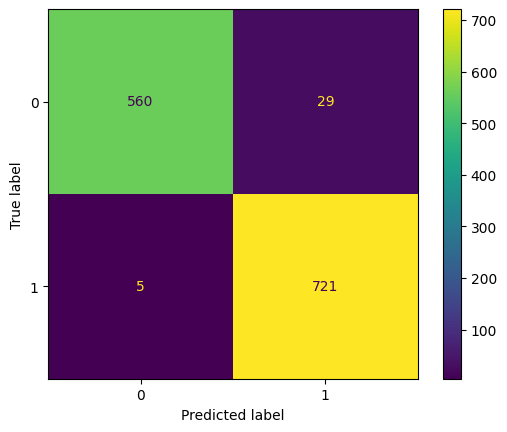

In [90]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)